In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
import sys
from plotting import *

In [6]:
################################################################################
### Loading of the synthetic dataset
################################################################################

##### Load the synthetic dataset:
# a. Load single CSV files in separate dfs
# b. Merge the dfs into one single "synthetic_dataset"

folder_path = '../data/synthetic_dataset' # NOTE: May need to adjust if the script is used from another folder

csv_files = glob.glob(os.path.join(folder_path, '*.csv')) # use glob library to find all CSV files

dfs = [] #to store individual DataFrames.

for file in csv_files:
    data = pd.read_csv(file, parse_dates=['time'], sep=',')
    # 'parse_dates' argument ensures the 'time' column is interpreted as datetime objects.
    
    dfs.append(data)

syn_ds = dfs[0] # Start with the first DataFrame as the base for merging.

for data in dfs[1:]:
    # Merge each subsequent DataFrame with the base DataFrame (`syn_ds`).
    # The merge is done using an ordered merge on the 'time' column.
    # This ensures that the merged dataset remains sorted by 'time'.
    syn_ds = pd.merge_ordered(syn_ds, data, on='time')

#-------------------------------------------------------------------------------
# Features and target variables:

syn_ds["time"] = pd.to_datetime(syn_ds["time"])
syn_ds["doy"] = syn_ds["time"].dt.dayofyear
syn_ds["hour"] = syn_ds["time"].dt.hour

################################################################################
### Loading the gaps
################################################################################

# Load datasets with gaps
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time columns are consistent
random_gaps['time'] = syn_ds['time']  # Align time with Synthetic dataset
structured_gaps['time'] = syn_ds['time']

c:\Users\ewa\Koding\GEO9300\GEO9300-Gap-Busters\notebooks\plotting.py:264: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range(start=start, end=end, freq=step)


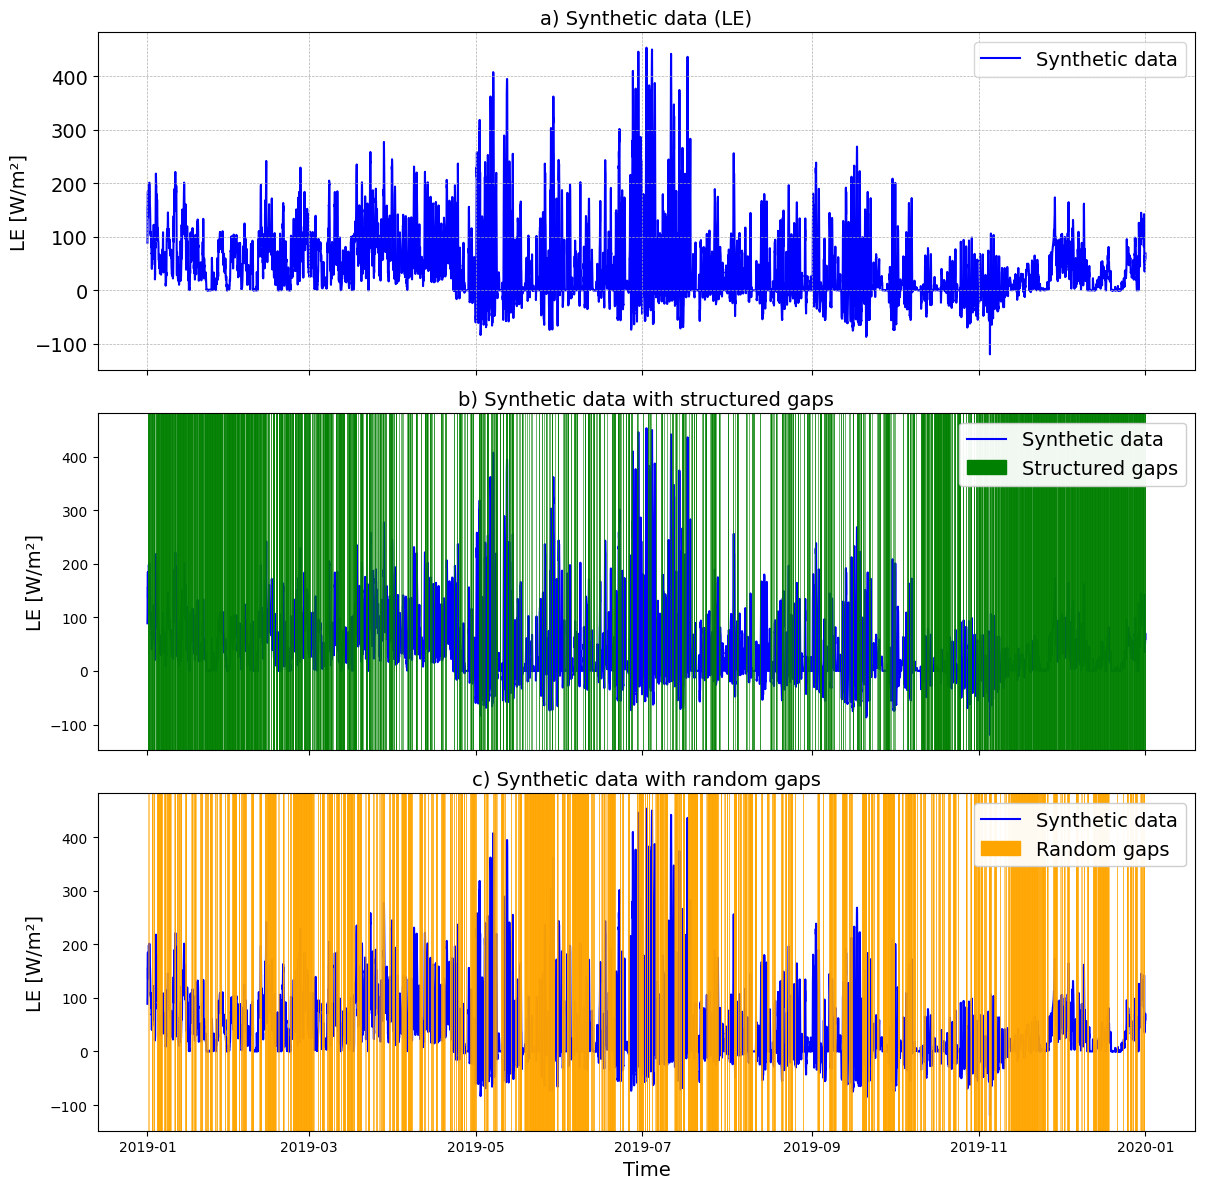

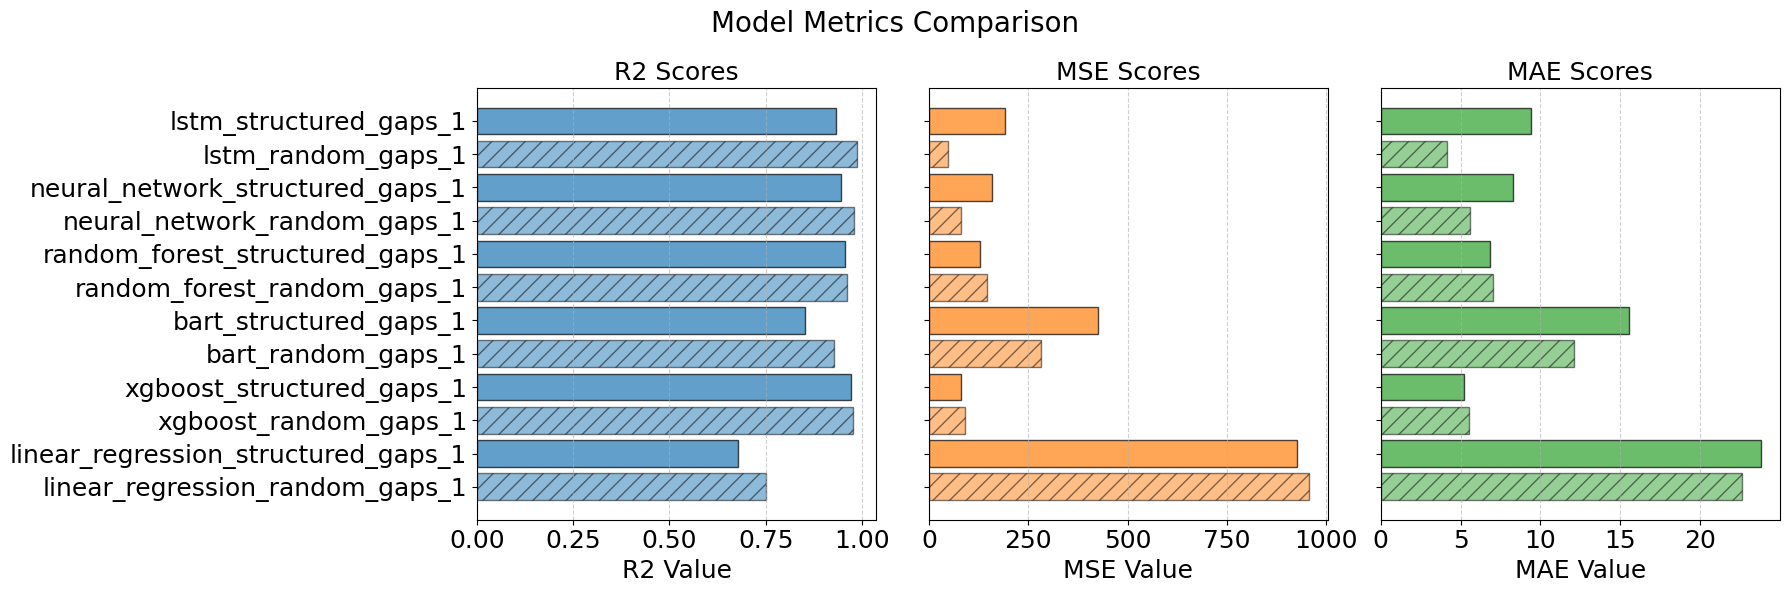

In [7]:
################################################################################
### Generation of charts for report
################################################################################

models = ['linear_regression_random_gaps_1', 'linear_regression_structured_gaps_1','xgboost_random_gaps_1','xgboost_structured_gaps_1', 'bart_random_gaps_1', 'bart_structured_gaps_1','random_forest_random_gaps_1','random_forest_structured_gaps_1', 'neural_network_random_gaps_1', 'neural_network_structured_gaps_1','lstm_random_gaps_1','lstm_structured_gaps_1']  # List your models here

# Figure 2 in report: Visualization of synthetic dataset and gaps (Figure 2 in report)
plot_data_with_gaps(syn_ds, random_gaps, structured_gaps)

# Figure 3.1 in report: Comparison of R2, MSE and MAE values for different models
plot_metrics_horizontal(models)

In [ ]:
##### Load the synthetic dataset and gaps:
# a. Load single CSV files in separate dfs
# b. Merge the dfs into one single "synthetic_dataset"

folder_path = '../data/synthetic_dataset' # NOTE: May need to adjust if the script is used from another folder

csv_files = glob.glob(os.path.join(folder_path, '*.csv')) # use glob library to find all CSV files

dfs = [] #to store individual DataFrames.

for file in csv_files:
    data = pd.read_csv(file, parse_dates=['time'], sep=',')
    # 'parse_dates' argument ensures the 'time' column is interpreted as datetime objects.
    
    dfs.append(data)

syn_ds = dfs[0] # Start with the first DataFrame as the base for merging.

for data in dfs[1:]:
    # Merge each subsequent DataFrame with the base DataFrame (`syn_ds`).
    # The merge is done using an ordered merge on the 'time' column.
    # This ensures that the merged dataset remains sorted by 'time'.
    syn_ds = pd.merge_ordered(syn_ds, data, on='time')

# Load datasets
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time is in datetime format
random_gaps['time'] = pd.to_datetime(random_gaps['time'])
structured_gaps['time'] = pd.to_datetime(structured_gaps['time'])

#-------------------------------------------------------------------------------
# Features and target variables:

syn_ds["time"] = pd.to_datetime(syn_ds["time"])
syn_ds["doy"] = syn_ds["time"].dt.dayofyear
syn_ds["hour"] = syn_ds["time"].dt.hour

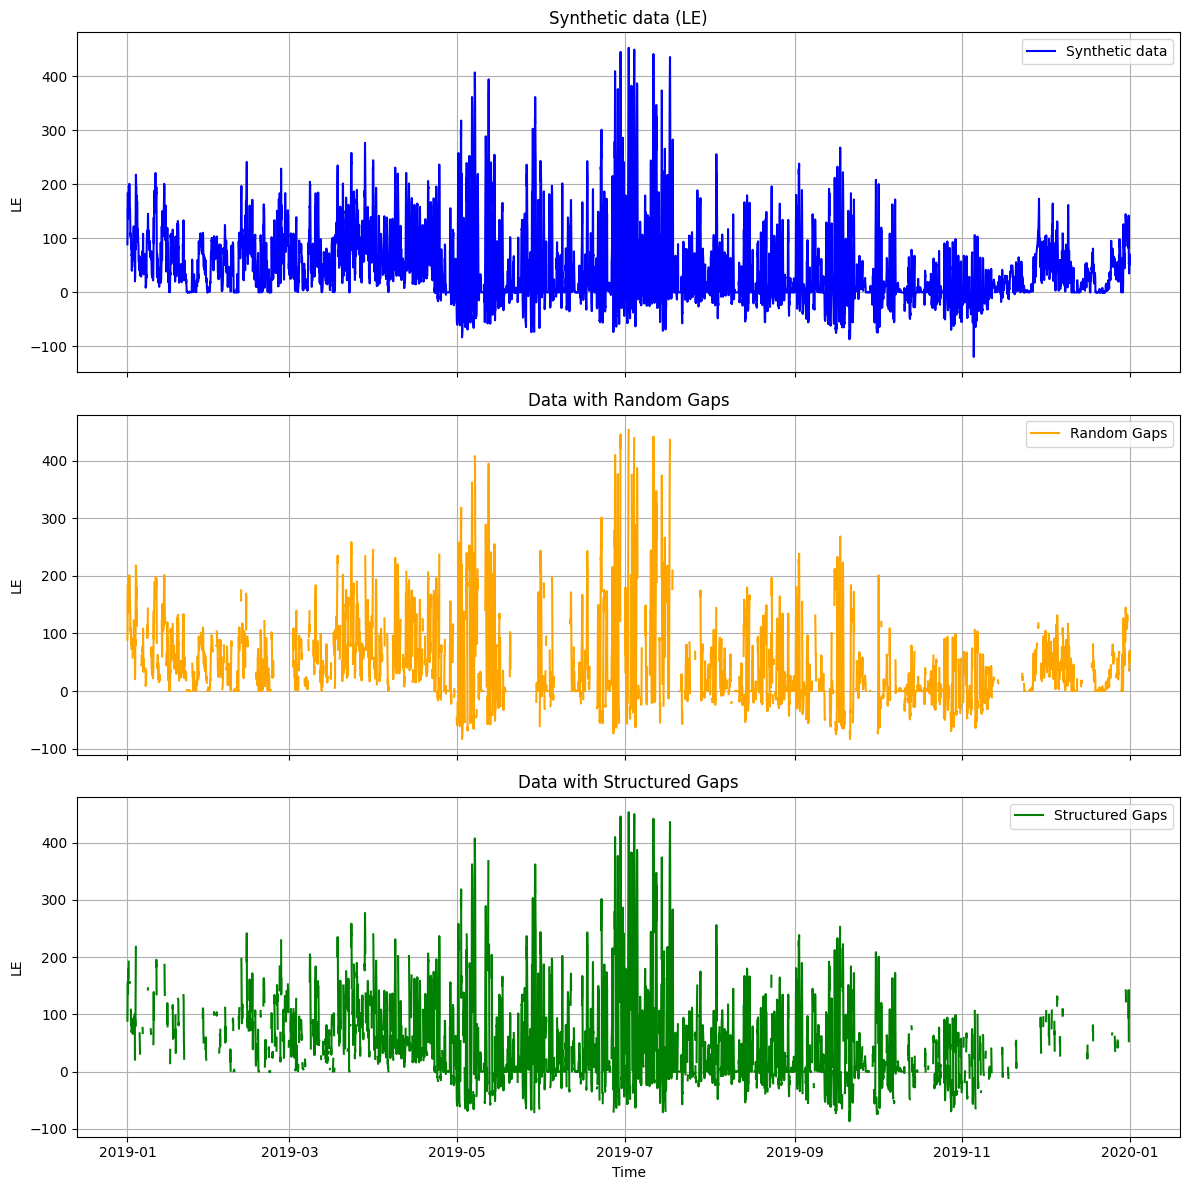

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time is in datetime format
random_gaps['time'] = pd.to_datetime(random_gaps['time'])
structured_gaps['time'] = pd.to_datetime(structured_gaps['time'])

# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot the Synthetic data
axes[0].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data')
axes[0].set_title('Synthetic data (LE)')
axes[0].set_ylabel('LE')
axes[0].grid(True)
axes[0].legend()

# Plot the data with random gaps
#axes[1].plot(syn_ds['time'], syn_ds['LE'], color='blue', alpha=0.3, label='Synthetic data (for reference)')
axes[1].plot(random_gaps['time'], random_gaps['LE_gaps'], color='orange', label='Random Gaps')
axes[1].set_title('Data with Random Gaps')
axes[1].set_ylabel('LE')
axes[1].grid(True)
axes[1].legend()

# Plot the data with structured gaps
#axes[2].plot(syn_ds['time'], syn_ds['LE'], color='blue', alpha=0.3, label='Synthetic data (for reference)')
axes[2].plot(structured_gaps['time'], structured_gaps['LE_gaps'], color='green', label='Structured Gaps')
axes[2].set_title('Data with Structured Gaps')
axes[2].set_ylabel('LE')
axes[2].set_xlabel('Time')
axes[2].grid(True)
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Synthetic dataset
syn_ds['time'] = pd.to_datetime(syn_ds['time'])  # Ensure time column is datetime

# Load datasets with gaps
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time columns are consistent
random_gaps['time'] = syn_ds['time']  # Align time with Synthetic dataset
structured_gaps['time'] = syn_ds['time']

# Identify missing data
def find_gaps(original, gapped):
    """Identify continuous gaps based on missing LE values."""
    gaps = []
    in_gap = False
    start = None

    for time, le_orig, le_gap in zip(original['time'], original['LE'], gapped['LE_gaps']):
        if pd.isna(le_gap) and not in_gap:
            start = time
            in_gap = True
        elif not pd.isna(le_gap) and in_gap:
            gaps.append((start, time))
            in_gap = False

    # Capture the last gap if it ends at the end of the dataset
    if in_gap:
        gaps.append((start, original['time'].iloc[-1]))

    return gaps

def add_thin_gap_bars(ax, gap_intervals, color, alpha=1, linewidth=0.4, step='1H'):
    """
    Add thin vertical bars for gaps instead of wide spans.
    """
    for start, end in gap_intervals:
        times = pd.date_range(start=start, end=end, freq=step)
        for t in times:
            ax.axvline(x=t, color=color, alpha=alpha, linewidth=linewidth, zorder=2)


C:\Users\ewa\AppData\Local\Temp\ipykernel_24672\3556745101.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  times = pd.date_range(start=start, end=end, freq=step)


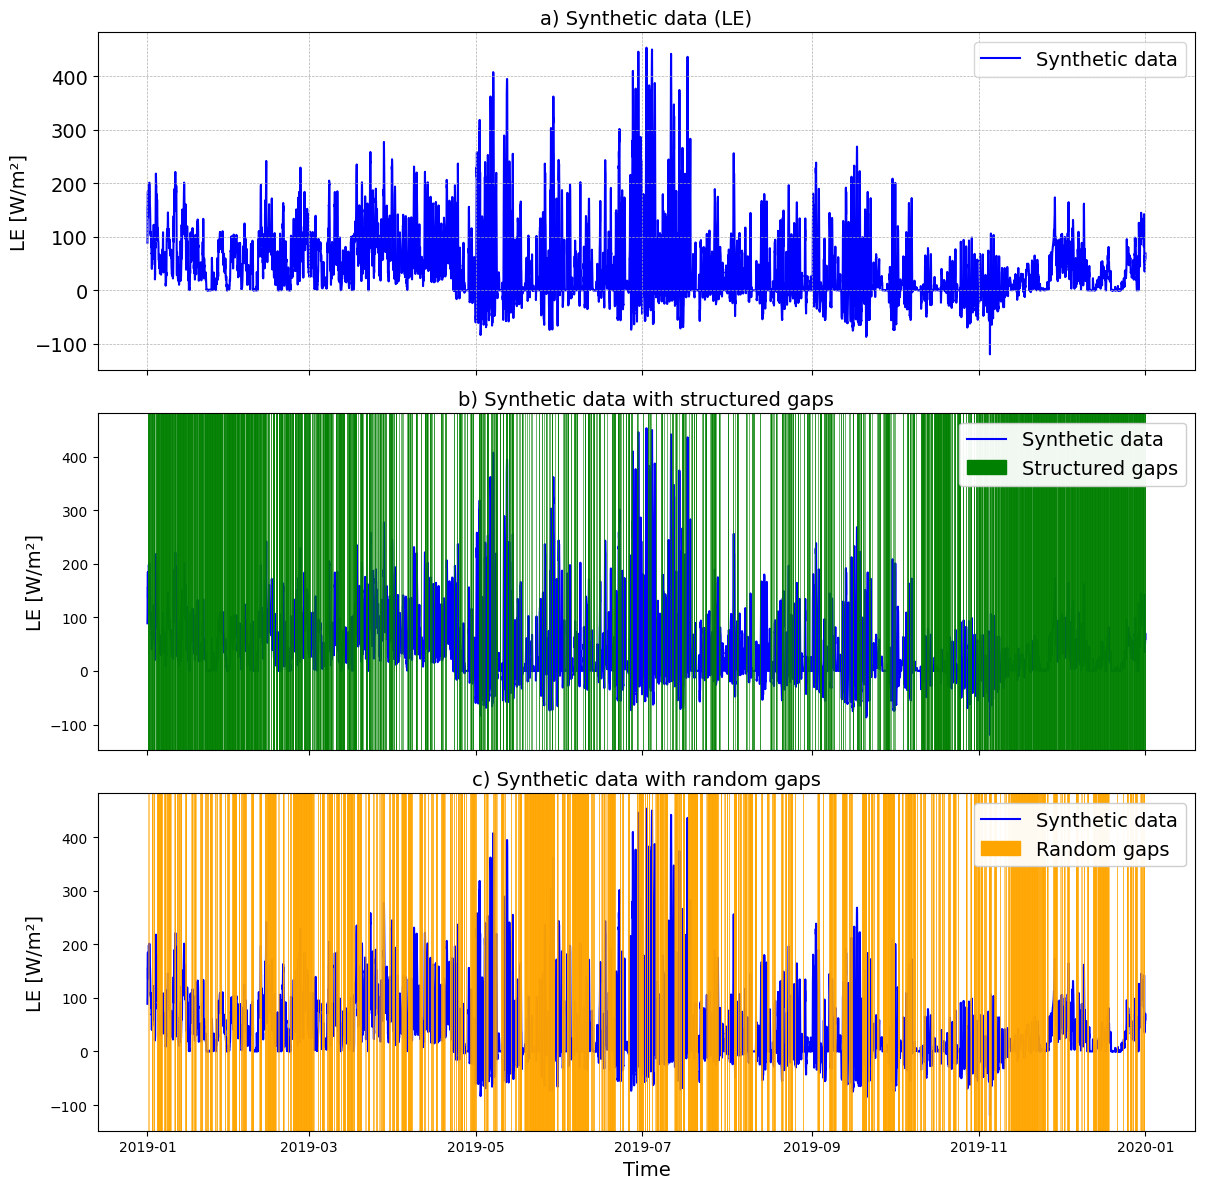

In [ ]:
from matplotlib.patches import Patch

# Identify missing data
# Find gaps
random_gaps_continuous = find_gaps(syn_ds, random_gaps)
structured_gaps_continuous = find_gaps(syn_ds, structured_gaps)

# Plot the data
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Subplot a: Synthetic data
axes[0].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
axes[0].set_title('a) Synthetic data (LE)', fontsize=14)
axes[0].set_ylabel(f'LE [W/m²]', fontsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].legend(fontsize=14)

# Subplot b: Synthetic data with structured gaps
axes[1].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
add_thin_gap_bars(axes[1], structured_gaps_continuous, color='green', alpha=1, step='2H')
axes[1].set_title('b) Synthetic data with structured gaps', fontsize=14)
axes[1].set_ylabel(f'LE [W/m²]', fontsize=14)

# Subplot c: Synthetic data with random gaps
axes[2].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
add_thin_gap_bars(axes[2], random_gaps_continuous, color='orange', alpha=1, step='2H')
axes[2].set_title('c) Synthetic data with random gaps', fontsize=14)
axes[2].set_ylabel(f'LE [W/m²]', fontsize=14)
axes[2].set_xlabel('Time', fontsize=14)

# Create custom legend patches for the gaps
structured_patch = Patch(color='green', label='Structured gaps', alpha=1)
random_patch = Patch(color='orange', label='Random gaps', alpha=1)

# Add the custom legend patches to the relevant subplots
axes[1].legend(
    handles=[axes[1].lines[0], structured_patch],  # First handle: synthetic data line, second: structured gaps
    labels=['Synthetic data', 'Structured gaps'],  # Corresponding labels
    fontsize=14,
    loc='upper right',
    framealpha=0.95,
)
axes[2].legend(
    handles=[axes[2].lines[0], random_patch],  # First handle: synthetic data line, second: random gaps
    labels=['Synthetic data', 'Random gaps'],  # Corresponding labels
    fontsize=14,
    loc='upper right',
    framealpha=0.95,
)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Random gaps: [(Timestamp('2019-01-01 08:00:00'), Timestamp('2019-01-01 11:00:00')), (Timestamp('2019-01-02 12:00:00'), Timestamp('2019-01-02 21:00:00')), (Timestamp('2019-01-03 04:00:00'), Timestamp('2019-01-03 07:00:00')), (Timestamp('2019-01-03 09:00:00'), Timestamp('2019-01-03 11:00:00')), (Timestamp('2019-01-04 11:00:00'), Timestamp('2019-01-06 04:00:00')), (Timestamp('2019-01-06 09:00:00'), Timestamp('2019-01-06 11:00:00')), (Timestamp('2019-01-07 02:00:00'), Timestamp('2019-01-07 15:00:00')), (Timestamp('2019-01-07 22:00:00'), Timestamp('2019-01-08 04:00:00')), (Timestamp('2019-01-08 12:00:00'), Timestamp('2019-01-09 13:00:00')), (Timestamp('2019-01-10 21:00:00'), Timestamp('2019-01-11 06:00:00')), (Timestamp('2019-01-11 18:00:00'), Timestamp('2019-01-11 22:00:00')), (Timestamp('2019-01-12 05:00:00'), Timestamp('2019-01-12 09:00:00')), (Timestamp('2019-01-12 12:00:00'), Timestamp('2019-01-12 15:00:00')), (Timestamp('2019-01-12 23:00:00'), Timestamp('2019-01-13 12:00:00')), (Times

C:\Users\ewa\AppData\Local\Temp\ipykernel_32572\225629159.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)  # Increased font size for y-ticks
C:\Users\ewa\AppData\Local\Temp\ipykernel_32572\225629159.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(axes[2].get_yticklabels(), fontsize=14)  # Increased font size for y-ticks
C:\Users\ewa\AppData\Local\Temp\ipykernel_32572\225629159.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12)  # Increased font size for x-ticks


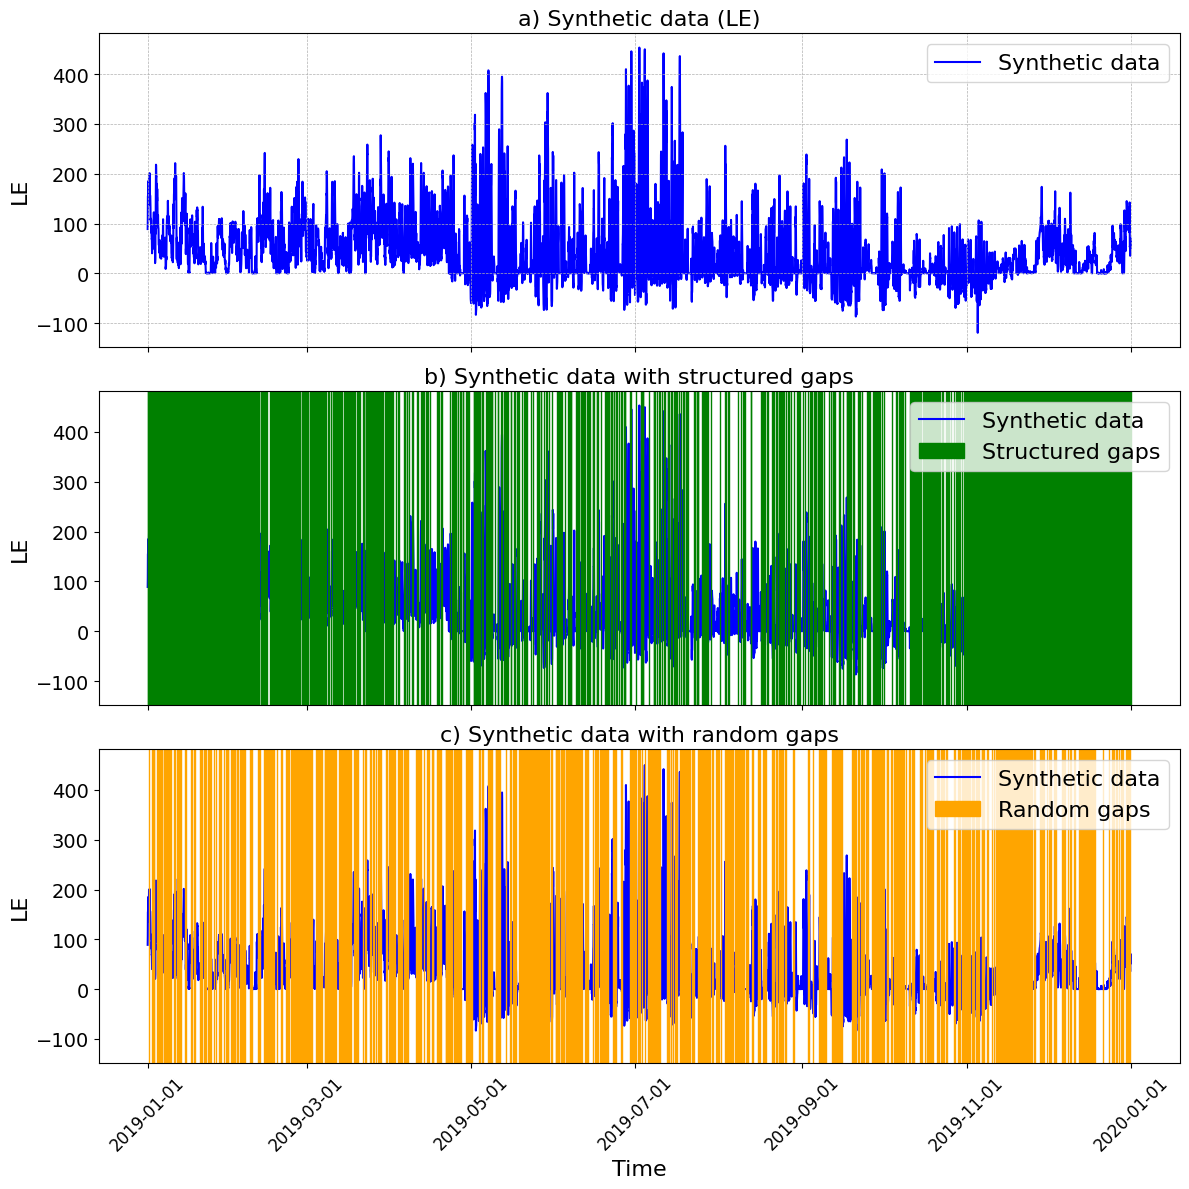

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets with gaps
random_gaps = pd.read_csv("../data/LE-gaps/random_gaps_1.csv")
structured_gaps = pd.read_csv("../data/LE-gaps/structured_gaps_1.csv")

# Ensure time columns are consistent
random_gaps['time'] = syn_ds['time']  # Align time with Synthetic dataset
structured_gaps['time'] = syn_ds['time']

# Identify missing data
def find_gaps(original, gapped):
    """Identify continuous gaps based on missing LE values."""
    gaps = []
    in_gap = False
    start = None

    for time, le_orig, le_gap in zip(original['time'], original['LE'], gapped['LE_gaps']):
        if pd.isna(le_gap) and not in_gap:
            start = time
            in_gap = True
        elif not pd.isna(le_gap) and in_gap:
            gaps.append((start, time))
            in_gap = False

    # Capture the last gap if it ends at the end of the dataset
    if in_gap:
        gaps.append((start, original['time'].iloc[-1]))

    return gaps

# Find gaps
random_gaps_continuous = find_gaps(syn_ds, random_gaps)
structured_gaps_continuous = find_gaps(syn_ds, structured_gaps)

# Debug print gap intervals
print("Random gaps:", random_gaps_continuous)
print("Structured gaps:", structured_gaps_continuous)

# Plot the data
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Subplot a: Synthetic data
axes[0].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
axes[0].set_title('a) Synthetic data (LE)', fontsize=16)
axes[0].set_ylabel('LE', fontsize=16)
axes[0].grid(True, linestyle='--', linewidth=0.5)  # Reduced thickness for grid
axes[0].tick_params(axis='both', labelsize=14)  # Increased font size for ticks
axes[0].legend(fontsize=16)
axes[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format time labels to only show the date

# Subplot b: Synthetic data with structured gaps
axes[1].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
for start, end in structured_gaps_continuous:
    axes[1].axvspan(start, end, color='green', alpha=1, label='Structured gaps' if start == structured_gaps_continuous[0][0] else None, zorder=2)
axes[1].set_title('b) Synthetic data with structured gaps', fontsize=16)
axes[1].set_ylabel('LE', fontsize=16)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=14)  # Increased font size for y-ticks
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12)  # Increased font size for x-ticks
axes[1].legend(fontsize=16)
axes[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format time labels to only show the date

# Subplot c: Synthetic data with random gaps
axes[2].plot(syn_ds['time'], syn_ds['LE'], color='blue', label='Synthetic data', zorder=1)
for start, end in random_gaps_continuous:
    axes[2].axvspan(start, end, color='orange', alpha=1, label='Random gaps' if start == random_gaps_continuous[0][0] else None, zorder=2)
axes[2].set_title('c) Synthetic data with random gaps', fontsize=16)
axes[2].set_ylabel('LE', fontsize=16)
axes[2].set_xlabel('Time', fontsize=16)
axes[2].set_yticklabels(axes[2].get_yticklabels(), fontsize=14)  # Increased font size for y-ticks
axes[2].set_xticklabels(axes[2].get_xticklabels(), fontsize=12)  # Increased font size for x-ticks
axes[2].legend(fontsize=16)
axes[2].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))  # Format time labels to only show the date

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [190]:
################################################################################
### 1 - Visualization of fit of predicted models to actual data
################################################################################

def plot_actual_vs_predicted(syn_ds, models, results_dir='../results'):
    plt.figure(figsize=(12, 6))

    # Check if 'time' column exists in syn_ds, otherwise use the index
    time_column = 'time' if 'time' in syn_ds.columns else syn_ds.index.name
    
    # Plot the actual y values (syn_ds['LE']) in the background
    plt.plot(syn_ds[time_column], syn_ds['LE'], label='Actual', color='gray', alpha=0.5)
    
    for model in models:
        predictions_file = f"{results_dir}/{model}_predictions.csv"
        predictions_df = pd.read_csv(predictions_file)
        
        # Ensure the predictions are aligned with syn_ds' time index
        aligned_predictions = pd.DataFrame(index=syn_ds.index)  # Initialize with syn_ds index
        
        # Initialize the 'Predicted' column as NaN, which represents missing values (gaps)
        aligned_predictions['Predicted'] = np.nan
        
        # Match the indices from predictions_df to syn_ds indices (where predictions exist)
        for idx, pred in zip(predictions_df['index'], predictions_df['Predicted']):
            if idx in aligned_predictions.index:
                aligned_predictions.loc[idx, 'Predicted'] = pred

        # Add the 'time' column from syn_ds to aligned_predictions
        aligned_predictions['time'] = syn_ds[time_column]

        # Plot the predicted values (gaps will naturally show as NaNs)
        plt.plot(aligned_predictions['time'], aligned_predictions['Predicted'], 
                 label=f'{model} Predicted', alpha=0.7)
    
    plt.xlabel('Time')
    plt.ylabel('Latent Heat Flux (LE)')
    plt.legend(loc='upper left')
    plt.title('Actual vs Predicted y Values')
    plt.grid(True)
    plt.show()


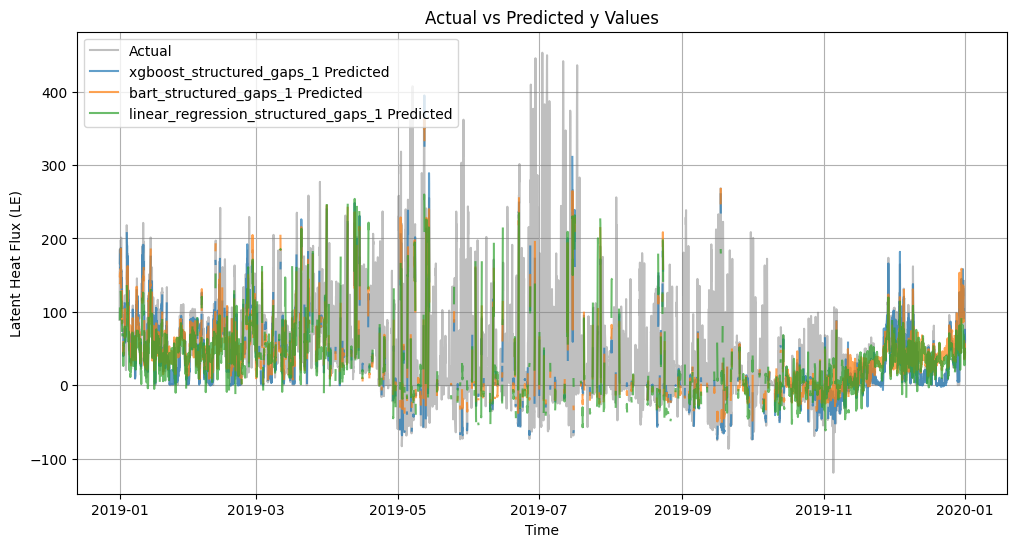

In [209]:
# 1 - Plotting
#models = ['xgboost_structured_gaps_1','linear_regression_structured_gaps_1','bart_structured_gaps_1','random_forest_structured_gaps_1','neural_network_structured_gaps_1','bart_structured_gaps_1']  # List your models here
models = ['xgboost_structured_gaps_1', 'bart_structured_gaps_1', 'linear_regression_structured_gaps_1']
plot_actual_vs_predicted(syn_ds, models)

In [8]:
################################################################################
### 2 - Comparison of R2 values for different models
################################################################################

def plot_r2_comparison(models, results_dir='../results'):
    r2_values = []
    model_labels = []
    
    for model in models:
        r2_file = f"{results_dir}/{model}_r2_results.csv"
        r2_df = pd.read_csv(r2_file)
        
        # Assuming the R2 values are in a column named 'R2'
        r2_values.append(r2_df['R2_Score'].mean())  # You can adjust how the R2 values are aggregated
        model_labels.append(model)
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(model_labels, r2_values, color='skyblue')
    plt.xlabel('R²')
    plt.title('R² Comparison of Different Models')
    plt.grid(True)
    plt.show()


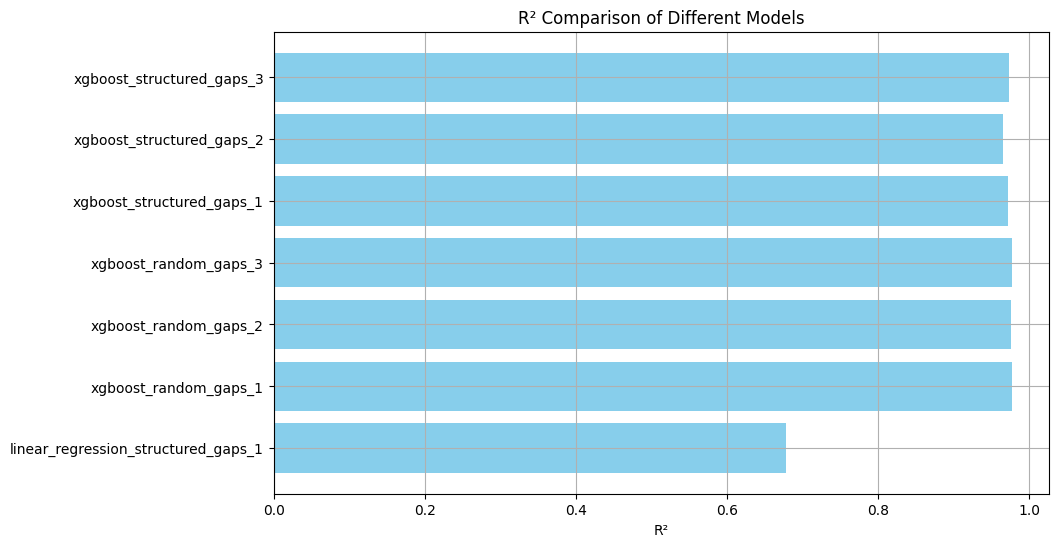

In [9]:
# 2 - Plotting
models = ['linear_regression_structured_gaps_1','xgboost_random_gaps_1','xgboost_random_gaps_2','xgboost_random_gaps_3','xgboost_structured_gaps_1','xgboost_structured_gaps_2', 'xgboost_structured_gaps_3']  # List your models here
plot_r2_comparison(models)

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_metrics_horizontal(models, results_dir="../results"):
    data = []

    # Load data for each model
    for model in models:
        metrics_file = f"{results_dir}/{model}_metrics_results.csv"
        df = pd.read_csv(metrics_file)
        df["Model"] = model
        data.append(df)

    # Combine data
    combined_df = pd.concat(data, ignore_index=True)

    # Extract metrics (ensure lowercase for columns)
    metrics = ["r2", "mse", "mae"]
    combined_df = combined_df[["Model"] + metrics]

    # Set up the figure with three subplots (one for each metric)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle('Model Metrics Comparison', fontsize=16)

    # Iterate over each metric and plot on the respective axis
    for i, metric in enumerate(metrics):
        values = combined_df[metric]
        model_labels = combined_df["Model"]

        # Determine hatch pattern for "random_gaps" models
        hatch = None
        for j, label in enumerate(model_labels):
            if "random_gaps" in label:
                hatch = "//"  # Apply hatch for random gaps models
            else:
                hatch = None  # No hatch for structured gaps models

            axes[i].barh(
                model_labels[j],  # Y-axis (models)
                values[j],  # X-axis (metric value)
                color=f"C{i}",  # Color for each metric
                edgecolor="black",
                hatch=hatch,
                alpha=0.7 if hatch is None else 0.5  # Less transparency for hatched bars
            )
        
        axes[i].set_title(f'{metric.upper()} Scores')
        axes[i].set_xlabel(f'{metric.upper()} Value')
        axes[i].grid(axis='x', linestyle='--', alpha=0.6)

    # Adjust layout
    fig.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust title positioning
    plt.show()


In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_metrics_horizontal(models, results_dir="../results"):
    data = []

    # Load data for each model
    for model in models:
        metrics_file = f"{results_dir}/{model}_metrics_results.csv"
        predictions_file = f"{results_dir}/{model}_predictions.csv"
        
        if pd.io.common.file_exists(metrics_file):  # If the metrics file exists
            df = pd.read_csv(metrics_file)
            df["Model"] = model
            data.append(df)
        elif pd.io.common.file_exists(predictions_file):  # If predictions file exists
            # Load the predictions and actual values
            pred_df = pd.read_csv(predictions_file)
            actual = pred_df['Actual']  # Actual values
            predicted = pred_df['Predicted']  # Predicted values

            # Calculate the metrics manually
            r2 = r2_score(actual, predicted)
            mse = mean_squared_error(actual, predicted)
            mae = mean_absolute_error(actual, predicted)

            # Create a DataFrame with the calculated metrics for this model
            metrics_df = pd.DataFrame({
                'Model': [model],
                'r2': [r2],
                'mse': [mse],
                'mae': [mae]
            })
            data.append(metrics_df)

    # Combine data
    combined_df = pd.concat(data, ignore_index=True)

    # Extract metrics (ensure lowercase for columns)
    metrics = ["r2", "mse", "mae"]
    combined_df = combined_df[["Model"] + metrics]

    # Set up the figure with three subplots (one for each metric)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle('Model Metrics Comparison', fontsize=20)  # Increased title font size

    # Iterate over each metric and plot on the respective axis
    for i, metric in enumerate(metrics):
        values = combined_df[metric]
        model_labels = combined_df["Model"]

        # Determine hatch pattern for "random_gaps" models
        hatch = None
        for j, label in enumerate(model_labels):
            if "random_gaps" in label:
                hatch = "//"  # Apply hatch for random gaps models
            else:
                hatch = None  # No hatch for structured gaps models

            axes[i].barh(
                model_labels[j],  # Y-axis (models)
                values[j],  # X-axis (metric value)
                color=f"C{i}",  # Color for each metric
                edgecolor="black",
                hatch=hatch,
                alpha=0.7 if hatch is None else 0.5,  # Less transparency for hatched bars
            )

        # Set titles, labels, and font sizes for the axes
        axes[i].set_title(f'{metric.upper()} Scores', fontsize=18)  # Increased font size for metric titles
        axes[i].set_xlabel(f'{metric.upper()} Value', fontsize=18)  # Increased font size for x-axis labels
        #axes[i].set_ylabel('Models', fontsize=18)  # Increased font size for y-axis labels
        axes[i].tick_params(axis='both', which='major', labelsize=18)  # Increased size of the tick labels
        axes[i].grid(axis='x', linestyle='--', alpha=0.6)

    # Adjust layout
    fig.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust title positioning
    plt.show()


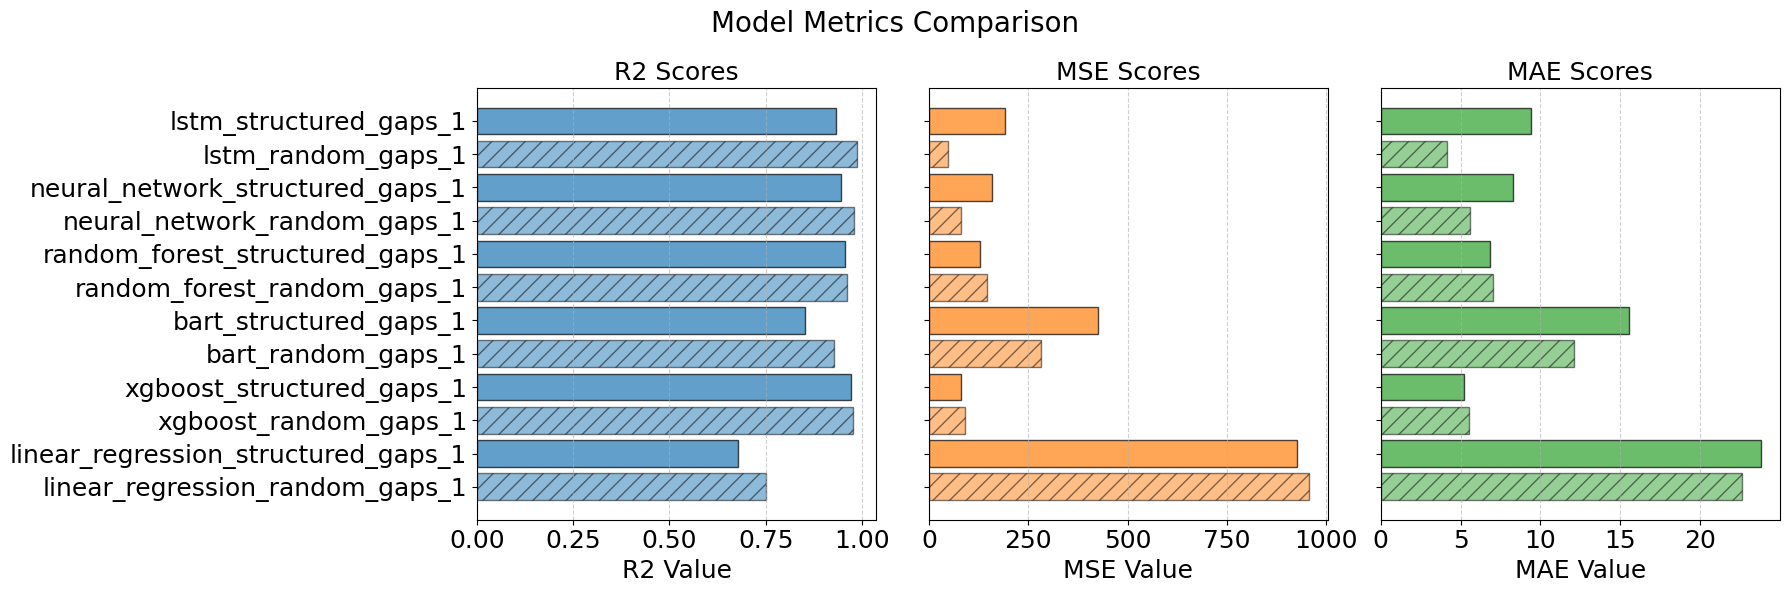

In [188]:
models = ['linear_regression_random_gaps_1', 'linear_regression_structured_gaps_1','xgboost_random_gaps_1','xgboost_structured_gaps_1', 'bart_random_gaps_1', 'bart_structured_gaps_1','random_forest_random_gaps_1','random_forest_structured_gaps_1', 'neural_network_random_gaps_1', 'neural_network_structured_gaps_1','lstm_random_gaps_1','lstm_structured_gaps_1']  # List your models here
plot_metrics_horizontal(models)

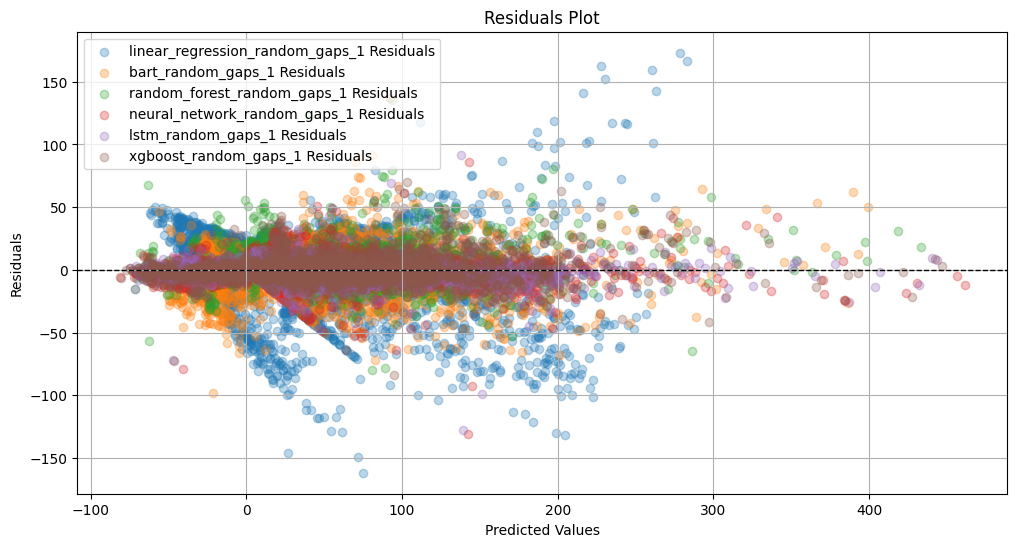

In [207]:
# Example usage
#models = ['linear_regression_random_gaps_1', 'linear_regression_structured_gaps_1','xgboost_random_gaps_1','xgboost_structured_gaps_1', 'bart_random_gaps_1', 'bart_structured_gaps_1','random_forest_random_gaps_1','random_forest_structured_gaps_1', 'neural_network_random_gaps_1', 'neural_network_structured_gaps_1','lstm_random_gaps_1','lstm_structured_gaps_1']  # List your models here
#models = ['linear_regression_structured_gaps_1','xgboost_structured_gaps_1', 'bart_structured_gaps_1','random_forest_structured_gaps_1', 'neural_network_structured_gaps_1','lstm_structured_gaps_1']  # List your models here
models = ['linear_regression_random_gaps_1','bart_random_gaps_1','random_forest_random_gaps_1','neural_network_random_gaps_1','lstm_random_gaps_1','xgboost_random_gaps_1']  # List your models here
plot_residuals(models)